### Inteligencia Artificial 2025 - Lab 2

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import geom
from scipy.stats import ks_2samp
from scipy.stats import probplot

import warnings
warnings.filterwarnings('ignore')
import analisis

# Ejercicio 1: Simulación de lanzamientos de una moneda
## Parte a: Estimación de la densidad del número de lanzamientos necesarios para obtener el primer éxito

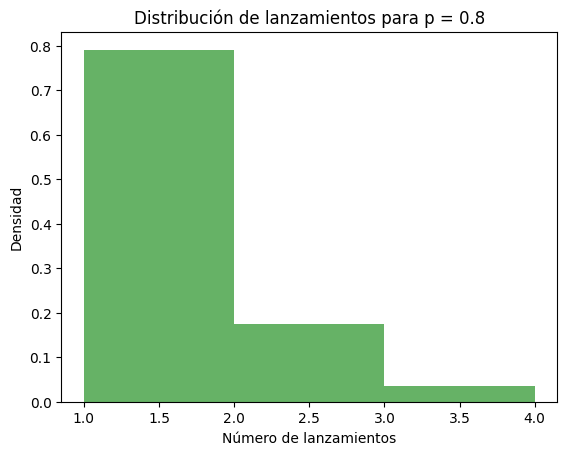

In [ ]:
def simular_lanzamientos(p, N):
    lanzamientos = []
    
    for _ in range(N):
        intentos = 0
        while np.random.rand() > p:
            intentos += 1
        lanzamientos.append(intentos + 1)  # Agregamos 1 porque el primer éxito ocurre en el intento n+1
    
    return lanzamientos

# Parámetros
p = float(input("Introduce la probabilidad de éxito p (0 < p < 1): "))
N = 1000

# Simulamos lanzamientos
lanzamientos = simular_lanzamientos(p, N)

# Visualizamos la distribución
plt.hist(lanzamientos, bins=range(1, max(lanzamientos) + 1), density=True, alpha=0.6, color='g')
plt.title(f"Distribución de lanzamientos para p = {p}")
plt.xlabel("Número de lanzamientos")
plt.ylabel("Densidad")
plt.show()


## Parte b: Visualización de la función de densidad para diferentes valores de p

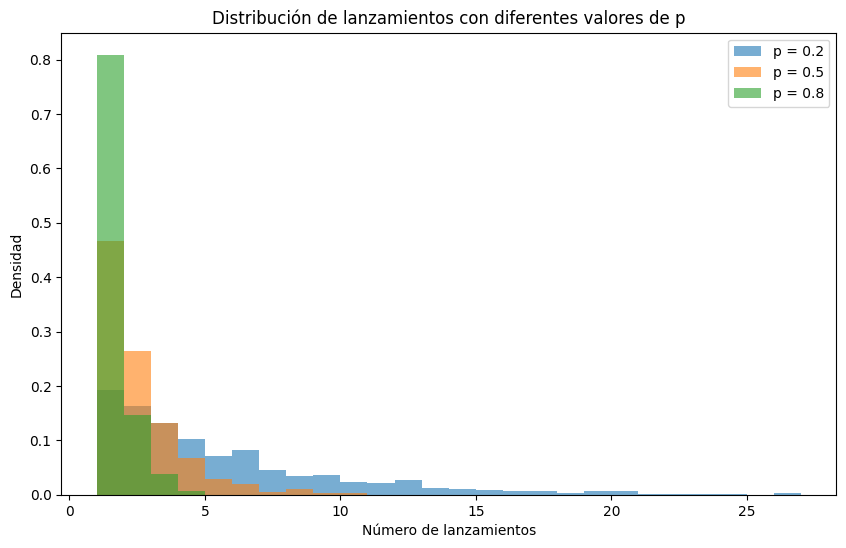

In [ ]:
# Valores de p
valores_p = [0.2, 0.5, 0.8]

# Simulamos y mostramos la distribución para cada valor de p
plt.figure(figsize=(10, 6))

for p in valores_p:
    lanzamientos = simular_lanzamientos(p, N)
    plt.hist(lanzamientos, bins=range(1, max(lanzamientos) + 1), density=True, alpha=0.6, label=f"p = {p}")

plt.title("Distribución de lanzamientos con diferentes valores de p")
plt.xlabel("Número de lanzamientos")
plt.ylabel("Densidad")
plt.legend()
plt.show()


# Ejercicio 2: Comparar dos muestras

Comparación con Geom(p):


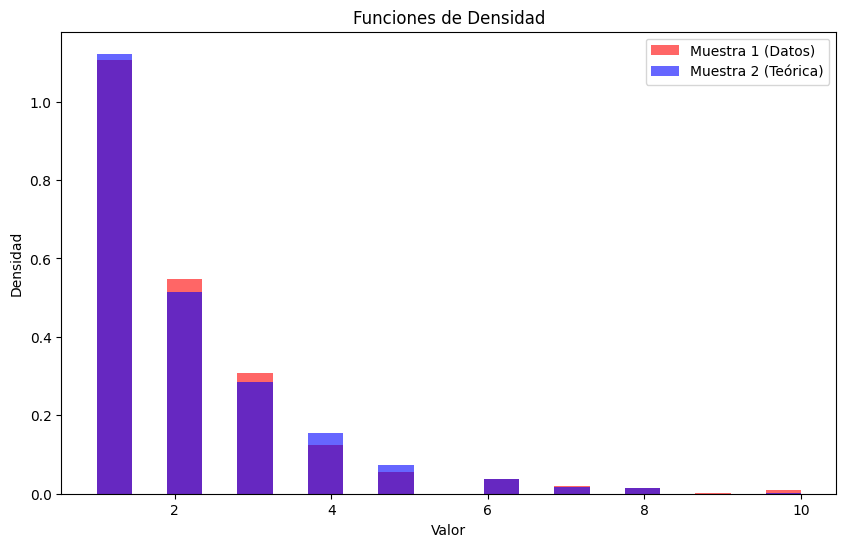

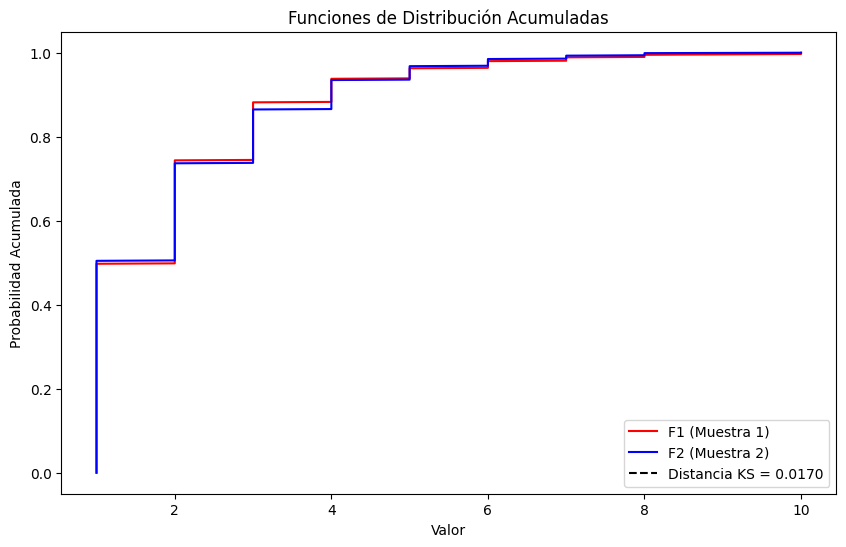

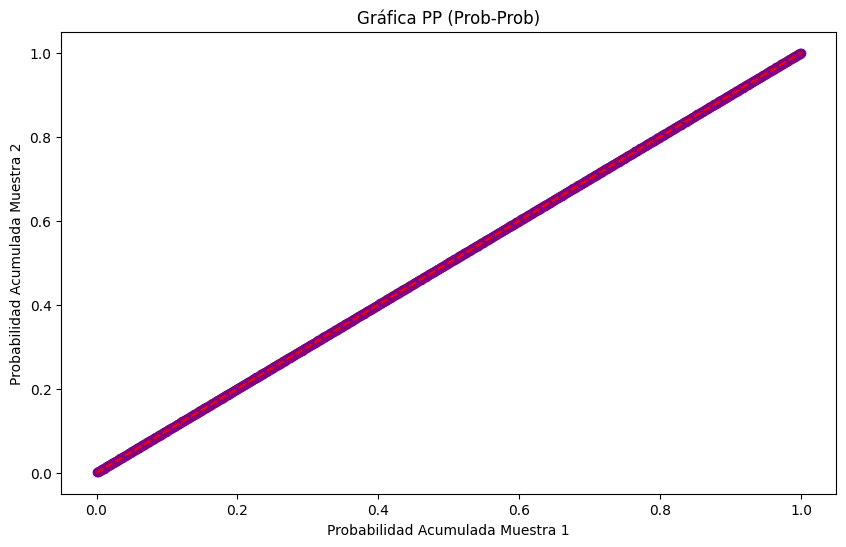

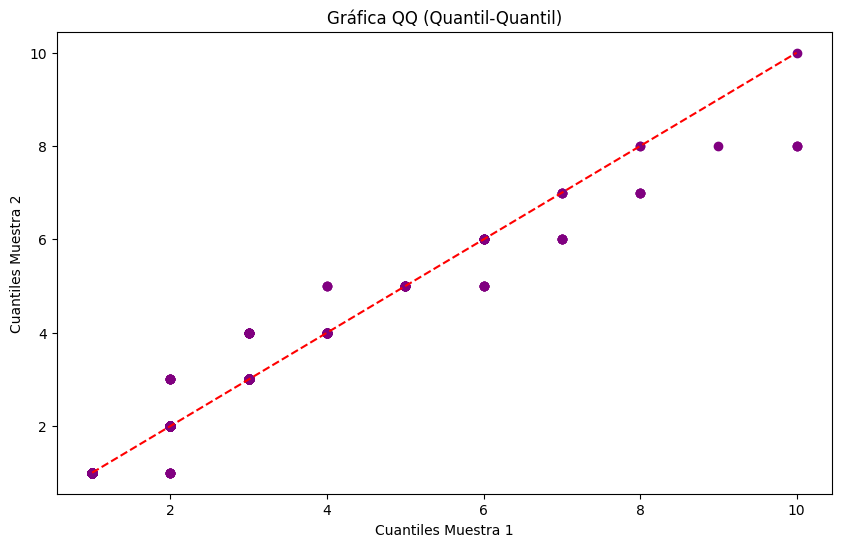

Estadística de KS: 0.0170
P-value de KS: 0.9987
Comparación con Geom(q):


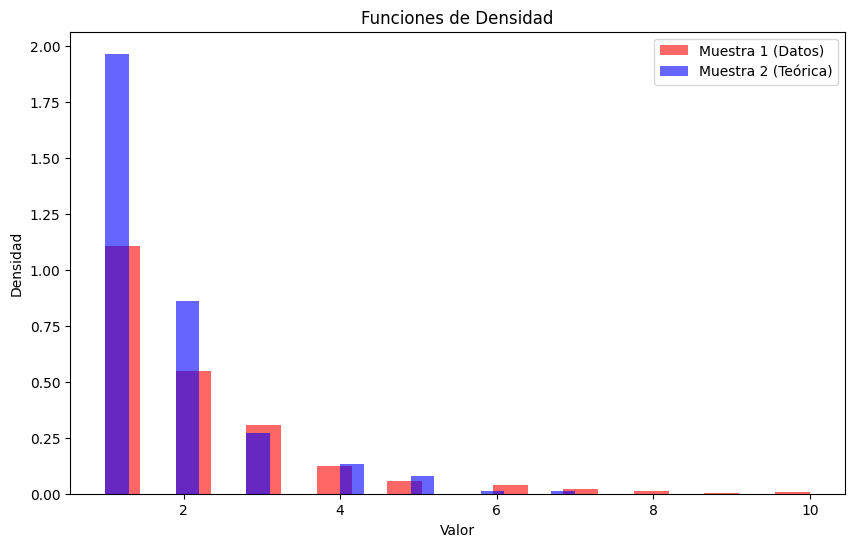

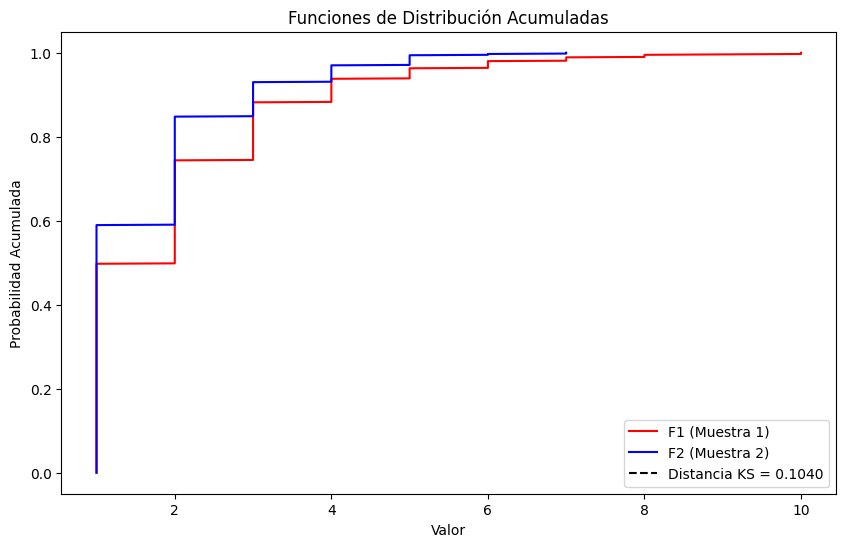

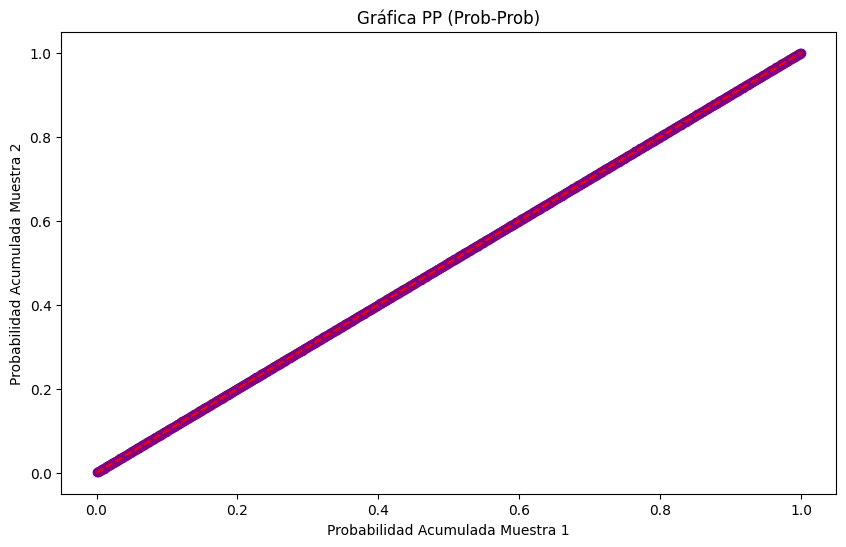

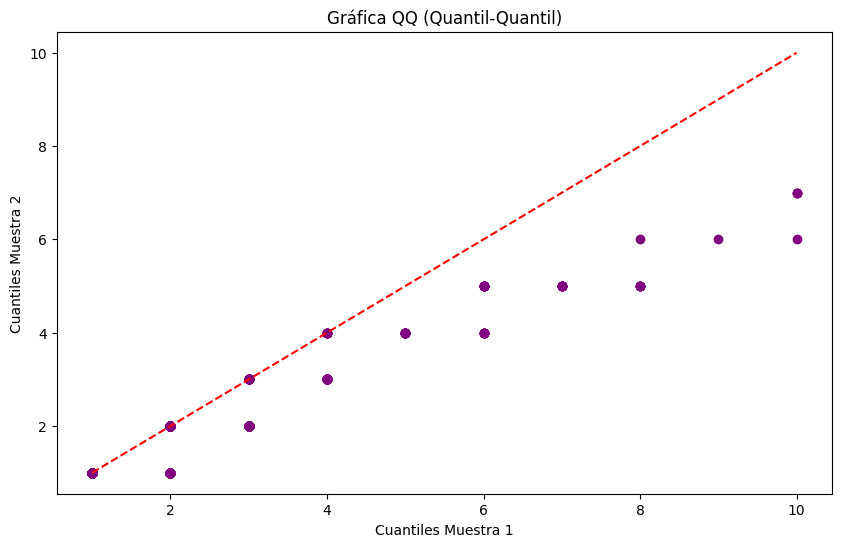

Estadística de KS: 0.1040
P-value de KS: 0.0000


(np.float64(0.104), np.float64(3.9587400002181794e-05))

In [ ]:
def comparar_muestras(muestra1, muestra2):

    # muestras
    muestra1_sorted = np.sort(muestra1)
    muestra2_sorted = np.sort(muestra2)

    # Histograma de densidad
    plt.figure(figsize=(10, 6))
    plt.hist(muestra1, bins=20, density=True, alpha=0.6, color='r', label="Muestra 1 (Datos)")
    plt.hist(muestra2, bins=20, density=True, alpha=0.6, color='b', label="Muestra 2 (Teórica)")
    plt.title("Funciones de Densidad")
    plt.xlabel("Valor")
    plt.ylabel("Densidad")
    plt.legend()
    plt.show()

    # Funciones de distribución acumulada (CDFs)
    plt.figure(figsize=(10, 6))
    f1 = np.arange(1, len(muestra1_sorted) + 1) / len(muestra1_sorted)
    f2 = np.arange(1, len(muestra2_sorted) + 1) / len(muestra2_sorted)

    plt.plot(muestra1_sorted, f1, color='r', label="F1 (Muestra 1)")
    plt.plot(muestra2_sorted, f2, color='b', label="F2 (Muestra 2)")

    # Distancia KS
    ks_statistic, p_value = ks_2samp(muestra1, muestra2)
    ks_x = muestra1_sorted[np.argmax(np.abs(f1 - f2))]
    ks_y1 = f1[np.argmax(np.abs(f1 - f2))]
    ks_y2 = f2[np.argmax(np.abs(f1 - f2))]

    plt.vlines(ks_x, ks_y1, ks_y2, color='black', linestyle="dashed", label=f"Distancia KS = {ks_statistic:.4f}")
    plt.title("Funciones de Distribución Acumuladas")
    plt.xlabel("Valor")
    plt.ylabel("Probabilidad Acumulada")
    plt.legend()
    plt.show()

    # Gráfica PP (Prob-Prob)
    plt.figure(figsize=(10, 6))
    plt.scatter(f1, f2, color='purple')
    plt.plot([0, 1], [0, 1], 'r--')  # Línea de referencia y = x
    plt.title("Gráfica PP (Prob-Prob)")
    plt.xlabel("Probabilidad Acumulada Muestra 1")
    plt.ylabel("Probabilidad Acumulada Muestra 2")
    plt.show()

    # Gráfica QQ (Quantil-Quantil)
    percentiles = np.linspace(0, 100, len(muestra1_sorted))
    plt.figure(figsize=(10, 6))
    plt.scatter(np.percentile(muestra1_sorted, percentiles), np.percentile(muestra2_sorted, percentiles), color='purple')
    plt.plot([muestra1_sorted[0], muestra1_sorted[-1]], [muestra1_sorted[0], muestra1_sorted[-1]], 'r--')  
    plt.title("Gráfica QQ (Quantil-Quantil)")
    plt.xlabel("Cuantiles Muestra 1")
    plt.ylabel("Cuantiles Muestra 2")
    plt.show()

    # Prueba de Kolmogorov-Smirnov
    print(f"Estadística de KS: {ks_statistic:.4f}")
    print(f"P-value de KS: {p_value:.4f}")

    return ks_statistic, p_value

# Parámetros
p = 0.5
q = min(1.2 * p, 0.99)  # Aseguramos que q < 1
N = 1000

# Generación de muestras
muestra_experimental = np.random.geometric(p, size=N)  # Simulación de lanzamientos reales
muestra_teorica_p = geom.rvs(p, size=N)  # Distribución teórica con p
muestra_teorica_q = geom.rvs(q, size=N)  # Distribución teórica con q = 1.2*p

# Comparación con distribución Geom(p)
print("Comparación con Geom(p):")
comparar_muestras(muestra_experimental, muestra_teorica_p)

# Comparación con distribución Geom(q)
print("Comparación con Geom(q):")
comparar_muestras(muestra_experimental, muestra_teorica_q)


#### Ejercicio 3

In [ ]:
areas = pd.read_csv("areas.csv", sep=";")
areas.count()

Country                      223
Area in square miles         223
Area in square kilometres    223
Total area rank              223
dtype: int64

Para dígitos en kilómetros cuadrados


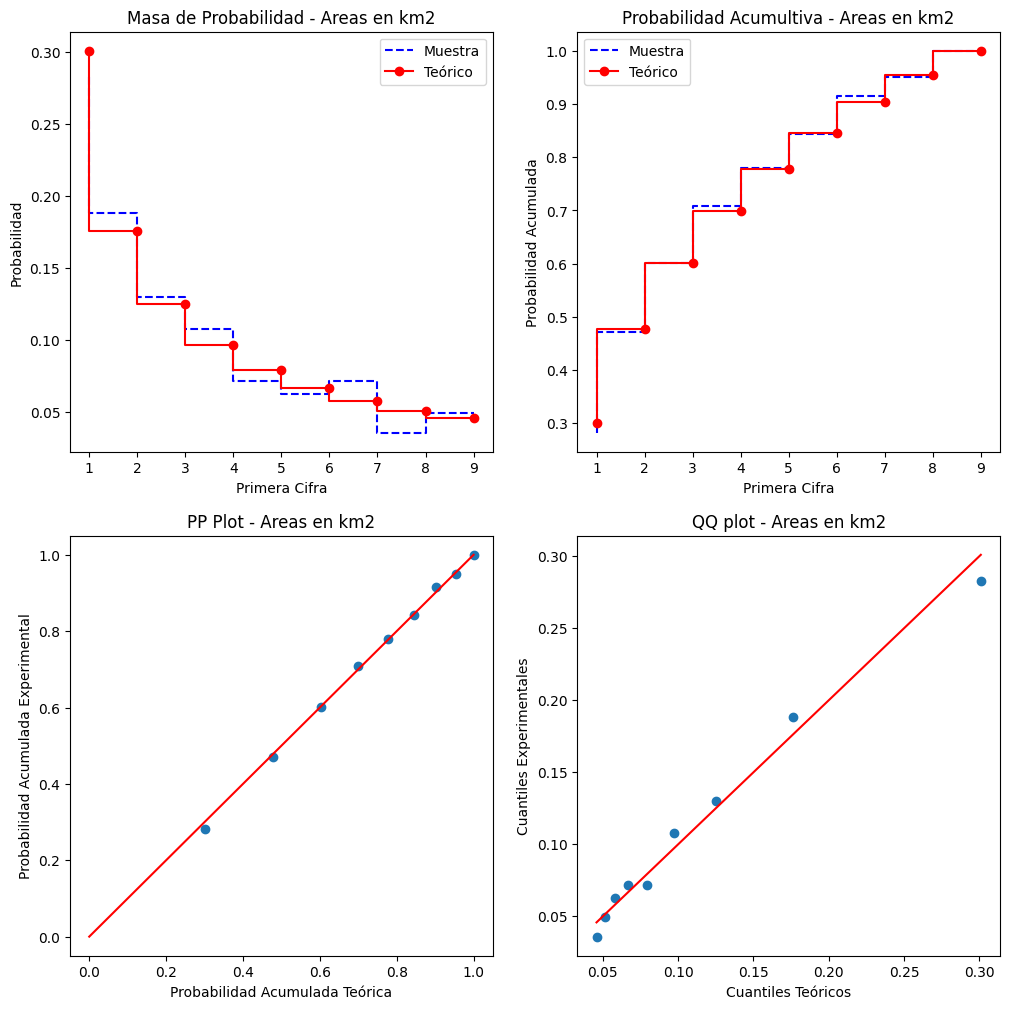

In [ ]:
# Análisis comparativo de datos (masa, p-acumulada, pp y qq)
print('Para dígitos en kilómetros cuadrados')
km_digit = areas['Area in square kilometres']
analisis.ej3_plots('Areas en km2',km_digit)

Para dígitos en Millas cuadradas


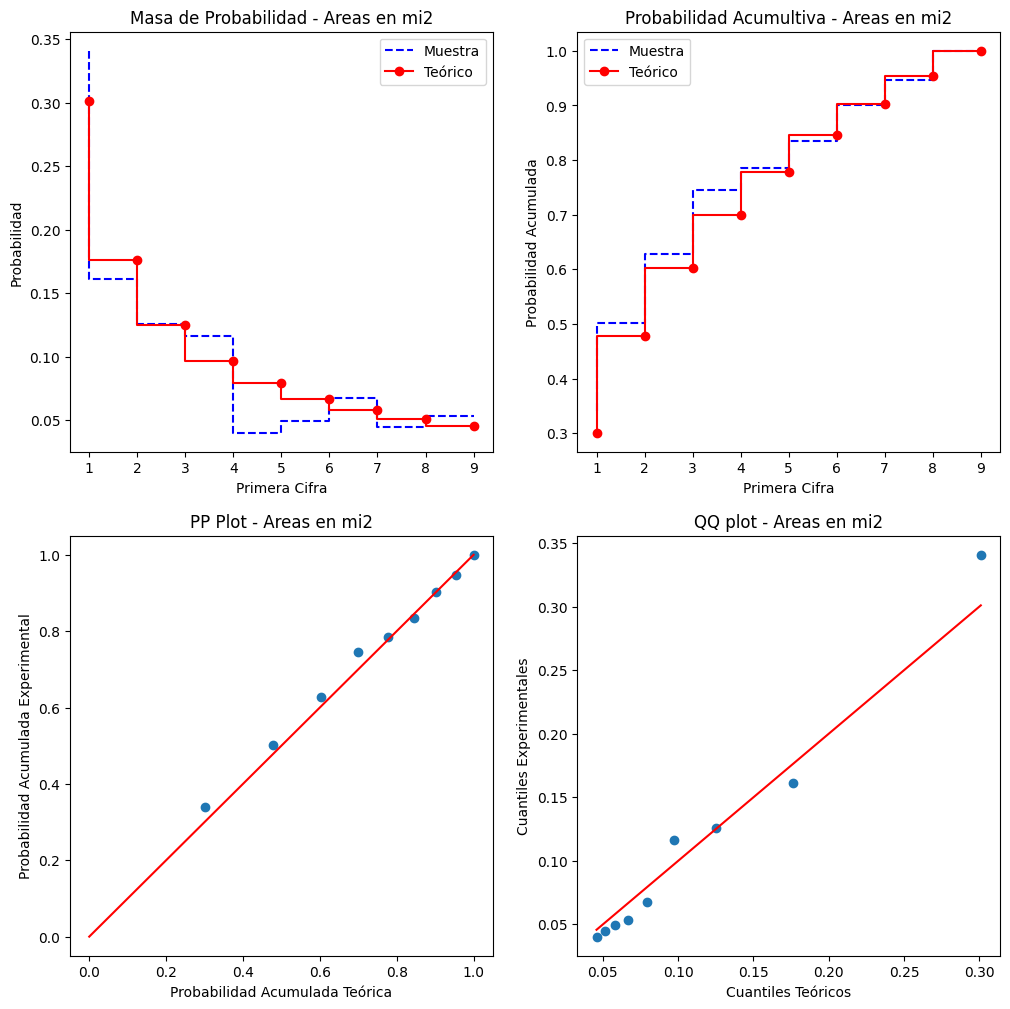

In [ ]:
print('Para dígitos en Millas cuadradas')
mi_digit = areas['Area in square miles']
analisis.ej3_plots('Areas en mi2',mi_digit)

In [ ]:
analisis.ej3_ks('Areas en km2',km_digit)

 -  Areas en km2
Prueba Kolmogorov-Smirnov
K-S: 0.3010
P: 0.0000000000

Prueba Chi Cuadrado
Chi Cuadrado: 2.7756
P: 0.9476


In [ ]:

analisis.ej3_ks('Areas en mi2',mi_digit)

 -  Areas en mi2
Prueba Kolmogorov-Smirnov
K-S: 0.3010
P: 0.0000000000

Prueba Chi Cuadrado
Chi Cuadrado: 8.4354
P: 0.3921


#### Ejercicio 4

Media
- Exp:  [-8.000e-03  9.889e+00  3.493e+00  1.910e+00]
- Teo:  [ 0.  10.   3.5  2. ]
Covarianza
- Exp: 
 [[ 0.773 -0.053  1.648  0.373]
 [-0.053  7.862  0.535  1.68 ]
 [ 1.648  0.535  5.138  1.087]
 [ 0.373  1.68   1.087  2.178]]
- Teo: 
 [[ 0.8  -0.2   1.6   0.38]
 [-0.2   7.97  0.27  1.66]
 [ 1.6   0.27  5.    1.1 ]
 [ 0.38  1.66  1.1   2.38]]


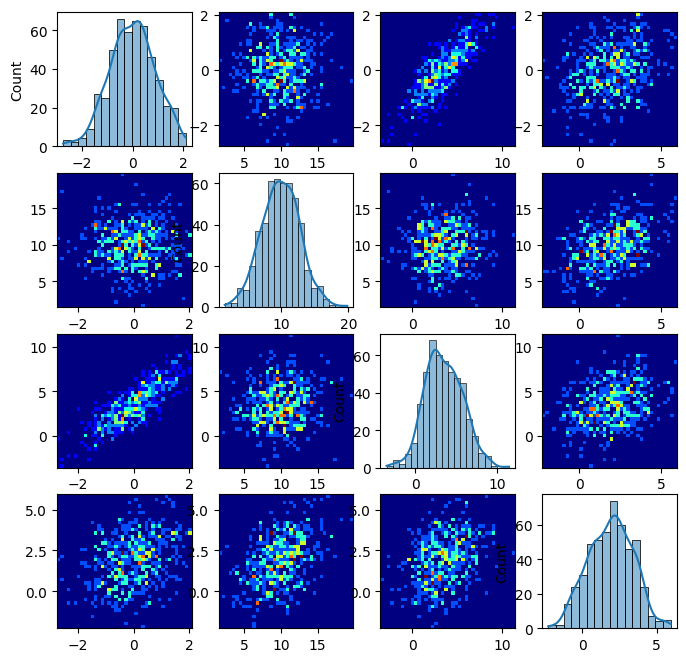

In [7]:
# Cantidades
n = int(input('Tamaño de la muestra: '))
d = int(input('Dimensión de las variables: '))

if d >=4: # Asegurando una dimensión mayor a 3
    mu0 = np.zeros(d)
    
    for i in range(0,d): # Se itera para llenar las medias
        mu0[i] = float(input(f'Media para variable No{i}: '))
        
    sig0 = np.eye(d)
    for i in range(0,d):    # Se itera para llenar la matriz
        for j in range(i,d):
            # Establecer el valor para Sij y Sji asegura simetría.
            sig0[i][j] = sig0[j][i] = float(input(f'Covarianza i={i} ,j={j} :'))
    
    # Generación del pairplot
    analisis.ej4_pairplot(mu0, sig0, n, d)
else:
    print('Dimensión es menor que 4')